<a href="https://colab.research.google.com/github/heffyhojay/HamoyeQuiz/blob/master/Hamoyequiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Number 1
A = [1,2,3,4,5,6]
B = [11,21,34]
A_B = A.extend(B)
print(A_B)

None


In [ ]:
#Number 2
import numpy as np
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**Number** **3**

In [ ]:
#Number 3
import numpy as np
import pandas as pd
import csv
import requests
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://bit.ly/HDSC-StageOneDataset'
target = 'fuel_dataset.csv'

reply = requests.get(url)
reply.raise_for_status()    #Check that request was successful
with open(target, 'wb') as data:
    data.write(reply.content)
print('Download Complete!')


my_dataset = pd.read_csv('fuel_dataset.csv')

Download Complete!


In [ ]:
my_dataset.groupby("fuel_type_code_pudl",as_index=False)["fuel_cost_per_unit_burned"].mean().sort_values(by="fuel_cost_per_unit_burned",ascending=True)

,fuel_type_code_pudl,fuel_cost_per_unit_burned
1,gas,13.659397
4,other,18.253856
5,waste,19.518122
0,coal,67.421830
3,oil,168.877086
2,nuclear,4955.157002


**Number** **4**

In [ ]:
my_dataset['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

**Number** **5**

In [ ]:
print(my_dataset['fuel_qty_burned'].skew())
print(my_dataset['fuel_qty_burned'].kurt())

15.851495469109503
651.3694501337732


**Number** **6**

In [ ]:
empty = my_dataset['fuel_unit'].isnull()
print(empty.sum())
my_dataset['fuel_unit'].count()

51


8496

In [ ]:
51/8496 * 100

0.6002824858757062

**Number** **7**

In [ ]:
print(my_dataset['fuel_unit'])

0        ton
1        ton
2        ton
3        ton
5        ton
        ... 
29503    ton
29510    ton
29516    ton
29517    ton
29521    ton
Name: fuel_unit, Length: 8547, dtype: object


**Number** **8**

In [ ]:
correlation = my_dataset.corr()
print(correlation)

                              utility_id_ferc1  ...  fuel_cost_per_mmbtu
utility_id_ferc1                      1.000000  ...             0.006122
report_year                           0.093323  ...             0.010261
fuel_qty_burned                      -0.057447  ...            -0.001896
fuel_mmbtu_per_unit                  -0.066946  ...            -0.005884
fuel_cost_per_unit_burned            -0.037863  ...            -0.000437
fuel_cost_per_unit_delivered         -0.016414  ...            -0.000109
fuel_cost_per_mmbtu                   0.006122  ...             1.000000

[7 rows x 7 columns]


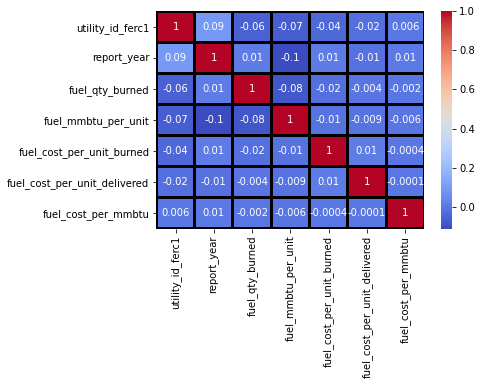

In [ ]:
sns.heatmap(correlation,annot=True, fmt='.1g',cmap='coolwarm',linewidths=2, linecolor='black')
plt.show()

**Number** **9**

In [ ]:
#since only the data of coal is needed, I will call out records of  my_dataset with fuel type coal
my_dataset.query("fuel_type_code_pudl == 'coal'", inplace = True)
#the sum of fuel_cost_per_unit_burned of coal in each year is
coal_data = my_dataset.groupby('report_year')['fuel_cost_per_unit_burned'].sum()
#the percentage change over a period of 4 years (1994 and 1998) is
coal_data.pct_change(periods=4)

report_year
1994         NaN
1995         NaN
1996         NaN
1997         NaN
1998   -0.205677
1999    0.118838
2000    6.911019
2001   -0.654589
2002   -0.229482
2003    0.898621
2004   -0.904091
2005   -0.264864
2006    0.352357
2007   -0.581149
2008    0.487879
2009    3.101388
2010    6.145852
2011    0.311284
2012    0.224316
2013   -0.612997
2014   -0.826102
2015   -0.215445
2016   -0.367328
2017   -0.418357
2018   -0.384371
Name: fuel_cost_per_unit_burned, dtype: float64

Number 10

In [ ]:
report = ['report_year', 'fuel_cost_per_unit_delivered']
count_1997 = 0
count_2018 = 0
count_1996 = 0
count_2004 = 0
count_2009 = 0
my_dataset[report].head()
for i in zip(my_dataset[report]['report_year'],my_dataset[report]['fuel_cost_per_unit_delivered']):
  if i[0] == 1996:
   count_1996 += i[1]
  if i[0] == 1997:
   count_1997 += i[1]
  if i[0] == 2004:
   count_2004 += i[1]
  if i[0] == 2009:
   count_2009 += i[1]
  if i[0] == 2018:
   count_2018 += i[1]

print('The average fuel cost per unit delivered in 1996 is ', count_1996 // len(my_dataset))
print('The average fuel cost per unit delivered in 1997 is ', count_1997 // len(my_dataset))
print('The average fuel cost per unit delivered in 2004 is ', count_2004 // len(my_dataset))
print('The average fuel cost per unit delivered in 2009 is ', count_2009 // len(my_dataset))
print('The average fuel cost per unit delivered in 2018 is ', count_2018 // len(my_dataset))

The average fuel cost per unit delivered in 1996 is  1.0
The average fuel cost per unit delivered in 1997 is  1.0
The average fuel cost per unit delivered in 2004 is  1.0
The average fuel cost per unit delivered in 2009 is  1.0
The average fuel cost per unit delivered in 2018 is  29.0
